In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np

# rcParams["font.family"]     = "Arial"
# rcParams["font.sans-serif"] = "Hiragino Maru Gothic Pro"
plt.style.use("ggplot")

In [2]:
HNscore = pd.read_csv(
    "../Data/06_HNscore/HN-score_rice_250524/HN-score_rice_250524_HN5_all.tsv",
    sep='\t'
) #this example using human HN-score csv file
HNscore

,GENEID,UP5,DOWN5,UNCHANGED5,HN5,UPcount+1 / DOWNcount+1 5
0,Os04g0107900,263,8,89,255,29.333333
1,Os01g0136100,253,8,99,245,28.222222
2,Os02g0259900,246,8,106,238,27.444444
3,Os02g0259850,245,8,107,237,27.333333
4,Os03g0245800,248,11,101,237,20.750000
...,...,...,...,...,...,...
35686,Os01g0952800,7,180,173,-173,0.044199
35687,Os07g0142100,11,187,162,-176,0.063830
35688,Os03g0307200,4,184,172,-180,0.027027
35689,Os07g0142200,9,195,156,-186,0.051020


# All gene

In [3]:
x_data = HNscore.index.values
y_data = HNscore["HN5"].values

## Upregulated gene

In [4]:
upregulated_genes = HNscore["HN5"] >= 42 # threshold for upregulated genes calculated by 04_gene_extract_rice.ipynb
upregulated_data = HNscore[upregulated_genes]

upregulated_indices = upregulated_data.index.values
y_data_up = upregulated_data['HN5'].values

## Downregulated gene

In [5]:
downregulated_genes = HNscore["HN5"] <= -40 # threshold for downregulated genes calculated by 04_gene_extract_rice.ipynb
downregulated_data = HNscore[downregulated_genes]

downregulated_indices = downregulated_data.index.values
y_data_down = downregulated_data['HN5'].values

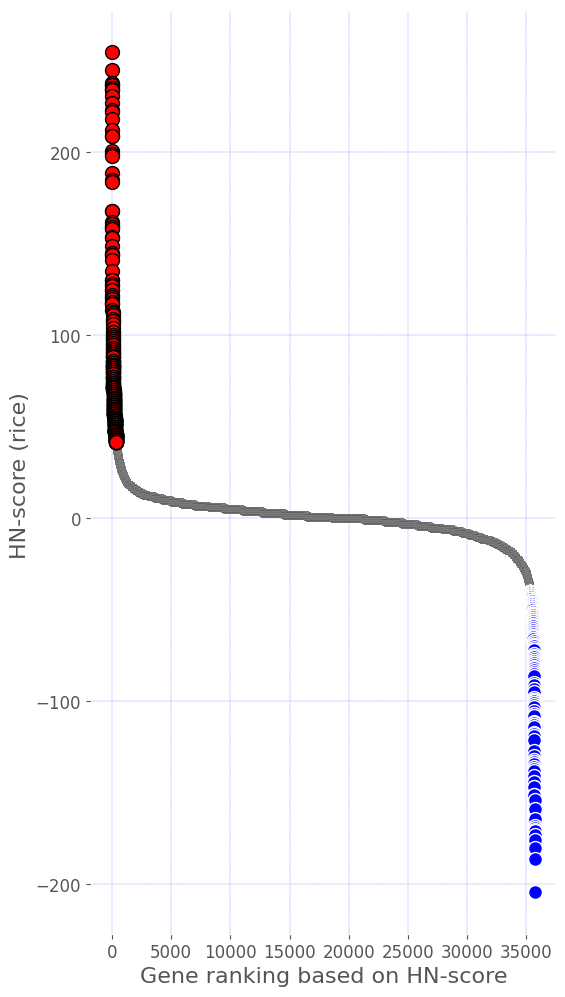

In [7]:
ax = plt.axes()
ax.set_facecolor('white')

#All genes
plt.scatter(
            x_data,
            y_data,
            s = 30,
            c="grey",
            edgecolors="black",
            linewidths=0.01,
            alpha=0.5,
            label="all genes"
            )

# upregulated genes
plt.scatter(
            upregulated_indices,
            y_data_up,
            s=100,
            c="red",
            edgecolors="black",
            linewidths=1,
            alpha=1,
            label="upregulated"
            )

#downregulated genes
plt.scatter(
            downregulated_indices,
            y_data_down,
            s=100,
            c="blue",
            edgecolors="white",
            linewidths=1,
            alpha=1,
            label="downregulated"
            )

plt.grid(color='b', linestyle=':', linewidth=0.3)
plt.rcParams["figure.figsize"] = [6, 12]  
plt.xlabel("Gene ranking based on HN-score", fontsize=16) 
plt.ylabel("HN-score (rice) ", fontsize=16)
plt.tick_params(labelsize=12)
plt.savefig("../Data/08_scatter_plots/HN-score_HN5_rice.png", format="png", dpi=500)